<a href="https://colab.research.google.com/github/Sandeep-2412/Project/blob/main/Project_Demo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Lung-Diseases-Classifier-master/sampledata/sample/sample/images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/00003122_015.png  
  inflating: images/00003122_017.png  
  inflating: images/00003124_000.png  
  inflating: images/00003129_000.png  
  inflating: images/00003129_001.png  
  inflating: images/00003129_004.png  
  inflating: images/00003129_009.png  
  inflating: images/00003129_011.png  
  inflating: images/00003135_000.png  
  inflating: images/00003140_007.png  
  inflating: images/00003159_001.png  
  inflating: images/00003169_001.png  
  inflating: images/00003177_002.png  
  inflating: images/00003186_004.png  
  inflating: images/00003186_005.png  
  inflating: images/00003190_018.png  
  inflating: images/00003191_001.png  
  inflating: images/00003198_002.png  
  inflating: images/00003198_005.png  
  inflating: images/00003198_009.png  
  inflating: images/00003205_002.png  
  inflating: images/00003212_000.png  
  inflating: images/00003221_002.png  
  inflating: images/00003230_000.png  
  inflating: 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
from sklearn.utils import shuffle

df = pd.read_csv('/content/drive/MyDrive/Lung-Diseases-Classifier-master/sampledata/sample_labels.csv')

diseases = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
#Number diseases
for disease in diseases :
    df[disease] = df['Finding Labels'].apply(lambda x: 1 if disease in x else 0)

# #test to perfect
# df = df.drop(df[df['Emphysema']==0][:-127].index.values)

#remove Y after age
df['Age']=df['Patient Age'].apply(lambda x: x[:-1]).astype(int)
df['Age Type']=df['Patient Age'].apply(lambda x: x[-1:])
df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)
df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)
# remove outliers
df = df.drop(df['Age'].sort_values(ascending=False).head(1).index)
df['Age'] = df['Age']/df['Age'].max()

#one hot data
# df = df.drop(df.index[4242])
df = df.join(pd.get_dummies(df['Patient Gender']))
df = df.join(pd.get_dummies(df['View Position']))

#random samples
df = shuffle(df)

#get other data
data = df[['Age', 'F', 'M', 'AP', 'PA']]
data = np.array(data)

#labels = df[diseases].as_matrix()
labels = df[diseases].values
files_list = ('/content/images/' + df['Image Index']).tolist()

# #test to perfect
# labelB = df['Emphysema'].tolist()

labelB = (df[diseases].sum(axis=1)>0).tolist()
labelB = np.array(labelB, dtype=int)

# RGB images

In [ ]:
from keras.preprocessing import image
from tqdm import tqdm

def path_to_tensor(img_path, shape):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=shape)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)/255
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, shape):
    list_of_tensors = [path_to_tensor(img_path, shape) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

train_labels = labelB[:3400][:, np.newaxis]
valid_labels = labelB[3400:4500][:, np.newaxis]
test_labels = labelB[4500:][:, np.newaxis]

train_data = data[:3400]
valid_data = data[3400:4500]
test_data = data[4500:]

img_shape = (64, 64)
train_tensors = paths_to_tensor(files_list[:3400], shape = img_shape)
valid_tensors = paths_to_tensor(files_list[3400:4500], shape = img_shape)
test_tensors = paths_to_tensor(files_list[4500:], shape = img_shape)

100%|██████████| 1105/1105 [00:22<00:00, 48.65it/s]


In [ ]:
import pickle

train_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/train_data_sample_rgb.p"
pickle.dump((train_labels, train_data, train_tensors), open(train_filename, 'wb'))

valid_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/valid_data_sample_rgb.p"
pickle.dump((valid_labels, valid_data, valid_tensors), open(valid_filename, 'wb'))

test_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/test_data_sample_rgb.p"
pickle.dump((test_labels, test_data, test_tensors), open(test_filename, 'wb'))

# Gray images

In [ ]:
from keras.preprocessing import image
from tqdm import tqdm

def path_to_tensor(img_path, shape):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, color_mode="grayscale", target_size=shape)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 1)
    x = image.img_to_array(img)/255
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 1) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths, shape):
    list_of_tensors = [path_to_tensor(img_path, shape) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

train_labels = labelB[:3400][:, np.newaxis]
valid_labels = labelB[3400:4500][:, np.newaxis]
test_labels = labelB[4500:][:, np.newaxis]

train_data = data[:3400]
valid_data = data[3400:4500]
test_data = data[4500:]

img_shape = (64, 64)
train_tensors = paths_to_tensor(files_list[:3400], shape = img_shape)
valid_tensors = paths_to_tensor(files_list[3400:4500], shape = img_shape)
test_tensors = paths_to_tensor(files_list[4500:], shape = img_shape)

100%|██████████| 1105/1105 [00:18<00:00, 58.29it/s]


In [ ]:
import pickle

train_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/train_data_sample_gray.p"
pickle.dump((train_labels, train_data, train_tensors), open(train_filename, 'wb'))

valid_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/valid_data_sample_gray.p"
pickle.dump((valid_labels, valid_data, valid_tensors), open(valid_filename, 'wb'))

test_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/test_data_sample_gray.p"
pickle.dump((test_labels, test_data, test_tensors), open(test_filename, 'wb'))

### Data Analysis

In [ ]:
# df = pd.read_csv('sample/Data_Entry_2017.csv')
df = pd.read_csv('/content/drive/MyDrive/Lung-Diseases-Classifier-master/data sample/Data_Entry_2017.csv')

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143


In [ ]:
diseases = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
#split diseases
for disease in diseases :
    df[disease] = df['Finding Labels'].apply(lambda x: 1 if disease in x else 0).astype(int)

df['No_Finding']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)
df['Finding']=df['Finding Labels'].apply(lambda x: 0 if 'No Finding' in x else 1)

In [ ]:
#remove last character in Age
df['Age']=df['Patient Age'].apply(lambda x: x[:-1]).astype(int)
df['Age Type']=df['Patient Age'].apply(lambda x: x[-1:])

np.unique(df['Age Type'], return_counts=True)

(array(['D', 'M', 'Y'], dtype=object), array([     1,     26, 112093]))

In [ ]:
df.loc[df['Age Type']=='M',['Age']] = df[df['Age Type']=='M']['Age'].apply(lambda x: round(x/12.)).astype(int)
df.loc[df['Age Type']=='D',['Age']] = df[df['Age Type']=='D']['Age'].apply(lambda x: round(x/365.)).astype(int)

In [ ]:
df.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Cardiomegaly,Emphysema,Effusion,Hernia,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No_Finding,Finding,Age
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,...,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,2646.078844,2486.438842,0.155649,0.155649,0.024724,0.022440,0.118685,0.002025,...,0.030191,0.051249,0.020540,0.041625,0.177221,0.015037,0.012067,0.538816,0.461184,46.898020
std,15.406320,8403.876972,341.246429,401.268227,0.016174,0.016174,0.155282,0.148111,0.323419,0.044950,...,0.171113,0.220505,0.141841,0.199732,0.381857,0.121702,0.109188,0.498493,0.498493,16.847488
min,0.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7310.750000,2500.000000,2048.000000,0.143000,0.143000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000
50%,3.000000,13993.000000,2518.000000,2544.000000,0.143000,0.143000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,10.000000,20673.000000,2992.000000,2991.000000,0.168000,0.168000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,183.000000,30805.000000,3827.000000,4715.000000,0.198800,0.198800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,414.000000


In [ ]:
df['Age'].sort_values(ascending=False).head(20)

46965     414
86264     413
91369     412
85404     412
20852     412
84810     411
101194    155
104590    155
98495     154
95794     153
74884     152
78795     151
58650     150
62929     149
48284     148
55742     148
58464      95
578        94
74733      94
74737      94
Name: Age, dtype: int64

In [ ]:
df = df.drop(df['Age'].sort_values(ascending=False).head(1).index)

<Axes: xlabel='Category', ylabel='count'>

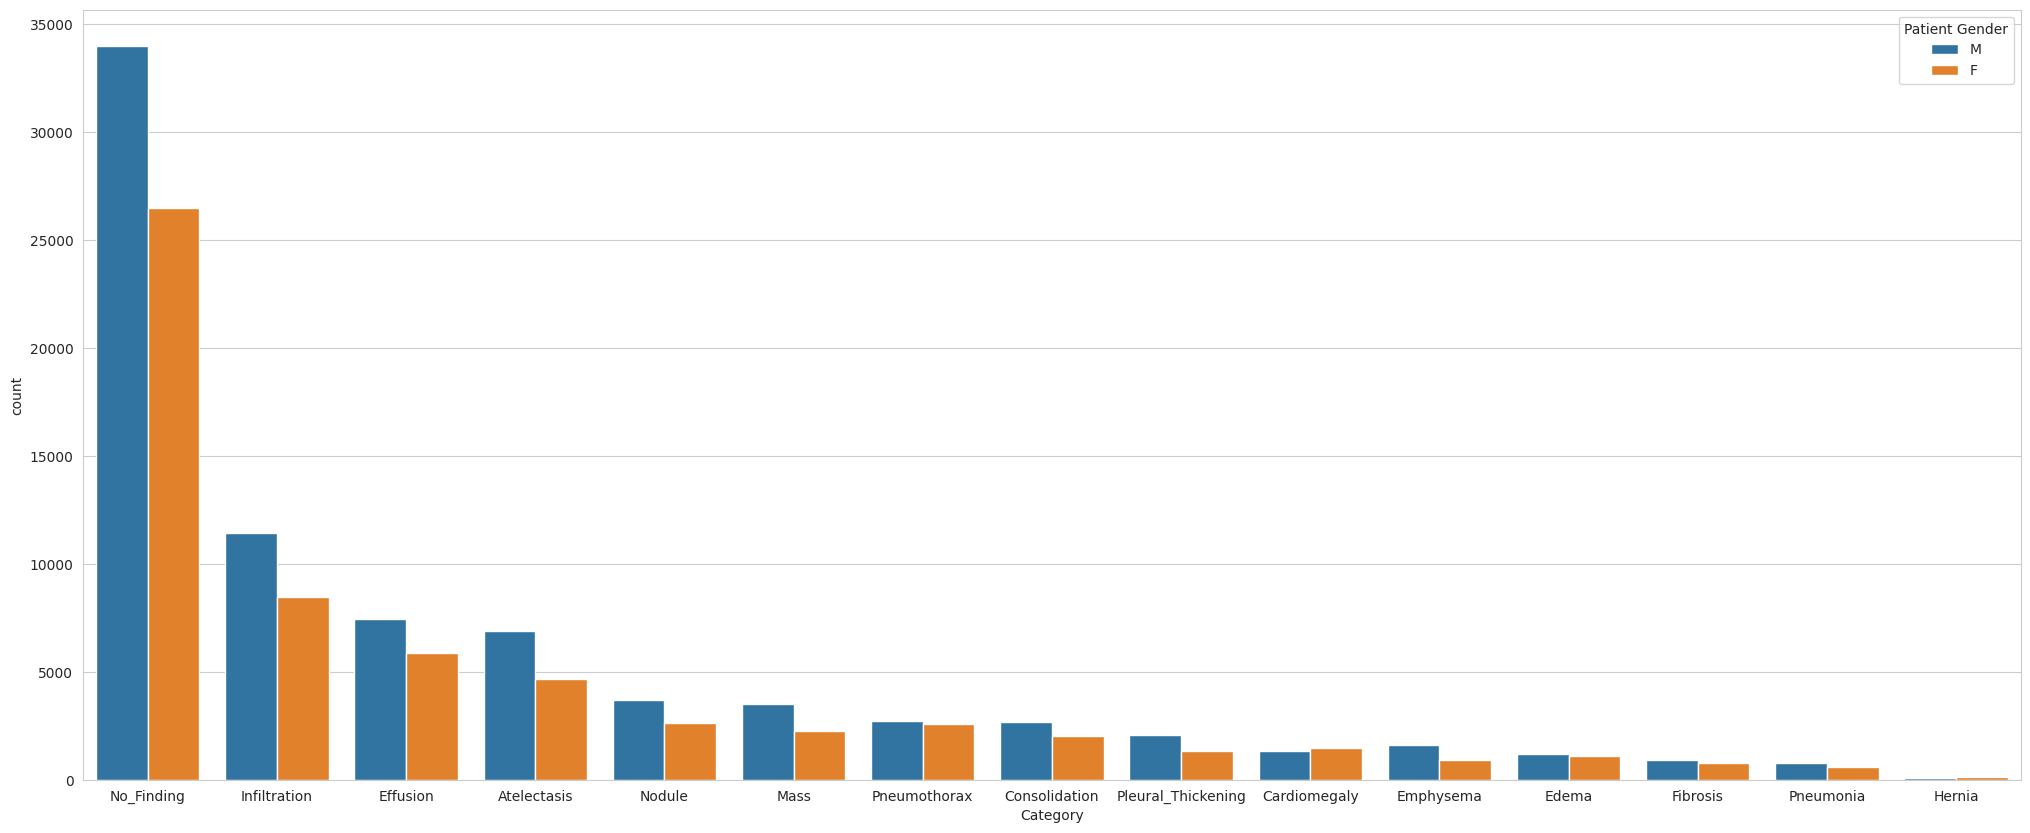

In [ ]:
sns.set_style('whitegrid')
%matplotlib inline
plt.figure(figsize=(25,10))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient Gender'], value_vars = list(diseases + ['No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

<Axes: xlabel='Category', ylabel='count'>

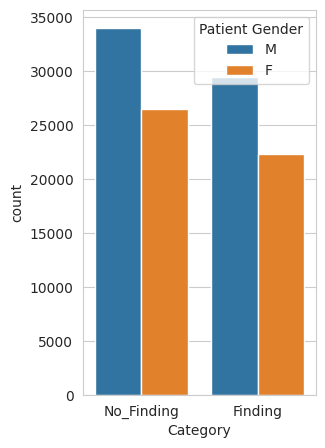

In [ ]:
plt.figure(figsize=(3,5))
ax = plt.subplot()

data = pd.melt(df, id_vars=['Patient Gender'], value_vars = list(['Finding', 'No_Finding']), var_name = 'Category', value_name = 'Count')
data = data.loc[data.Count>0]

sns.countplot(x='Category',hue='Patient Gender',data=data, ax=ax, order = data['Category'].value_counts().index)

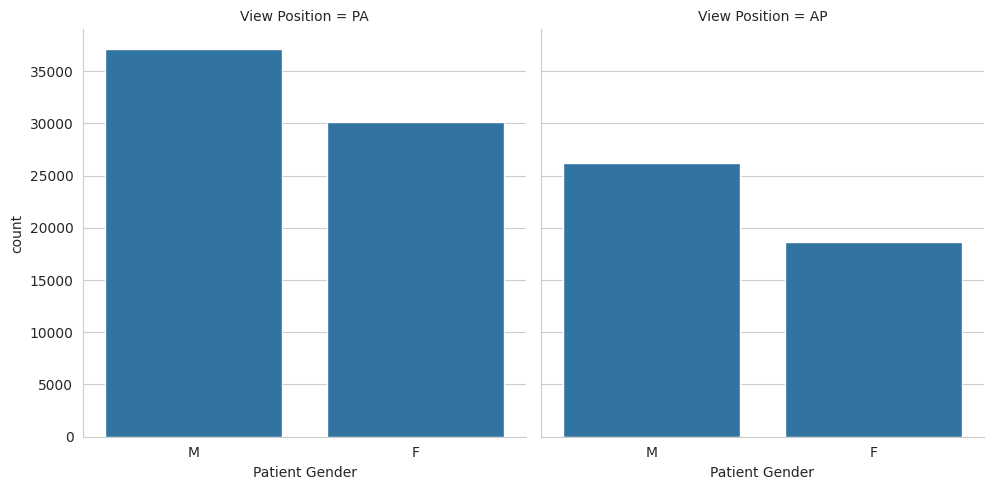

In [ ]:
sns.catplot(x="Patient Gender", col="View Position",data=df, kind="count");

In [ ]:
df[df['Patient ID'] == 61]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No_Finding,Finding,Age,Age Type
264,00000061_000.png,Infiltration|Nodule,0,61,077Y,M,PA,3056,2500,0.139,...,0,0,0,1,0,0,0,1,77,Y
265,00000061_001.png,Mass,1,61,077Y,M,PA,2530,2717,0.143,...,1,0,0,0,0,0,0,1,77,Y
266,00000061_002.png,Effusion,2,61,077Y,M,PA,2992,2991,0.143,...,0,0,0,0,0,0,0,1,77,Y
267,00000061_003.png,Effusion|Pleural_Thickening,3,61,077Y,M,PA,3056,2472,0.139,...,0,0,0,0,0,0,0,1,77,Y
268,00000061_004.png,Atelectasis|Effusion,4,61,077Y,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,1,77,Y
269,00000061_005.png,Effusion|Infiltration,5,61,077Y,M,AP,3056,2544,0.139,...,0,0,0,1,0,0,0,1,77,Y
270,00000061_006.png,Effusion,6,61,077Y,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,1,77,Y
271,00000061_007.png,Effusion,7,61,078Y,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,1,78,Y
272,00000061_008.png,Effusion,8,61,078Y,M,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,1,78,Y
273,00000061_009.png,Effusion|Infiltration,9,61,077Y,M,AP,3056,2544,0.139,...,0,0,0,1,0,0,0,1,77,Y


OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



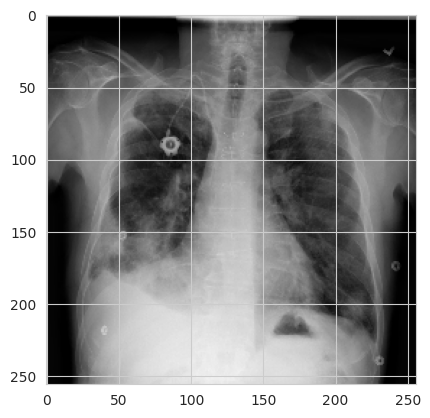

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion faile

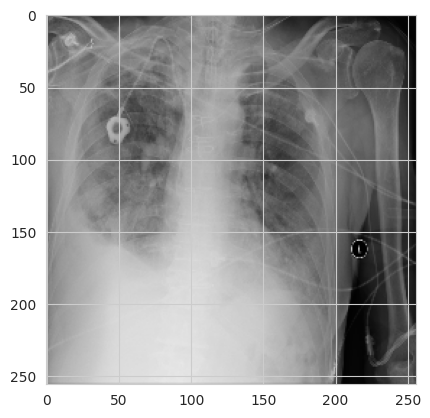

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



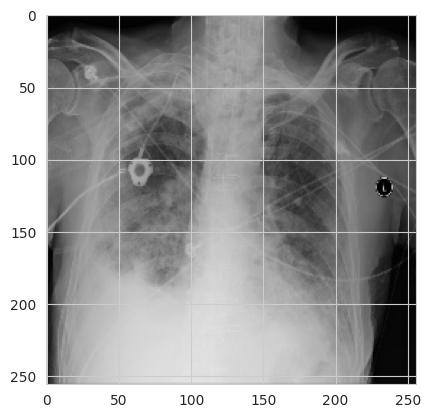

In [ ]:
%matplotlib inline
def show_image(img_path):
  try:
    image = cv2.imread(img_path)
    img = cv2.resize(image, (256, 256))
    plt.imshow(img)
    plt.show()
  except Exception as e:
    print(str(e))

for img_path in df[df['Patient ID'] == 61]['Image Index'].tolist():
    show_image('/content/images/' + img_path)

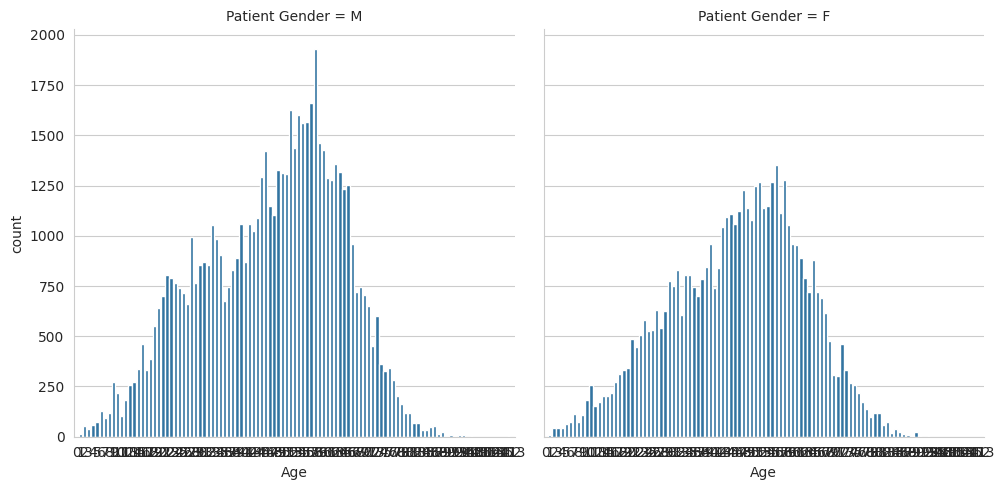

In [ ]:
sns.catplot(x="Age", col="Patient Gender",data=df, kind="count");

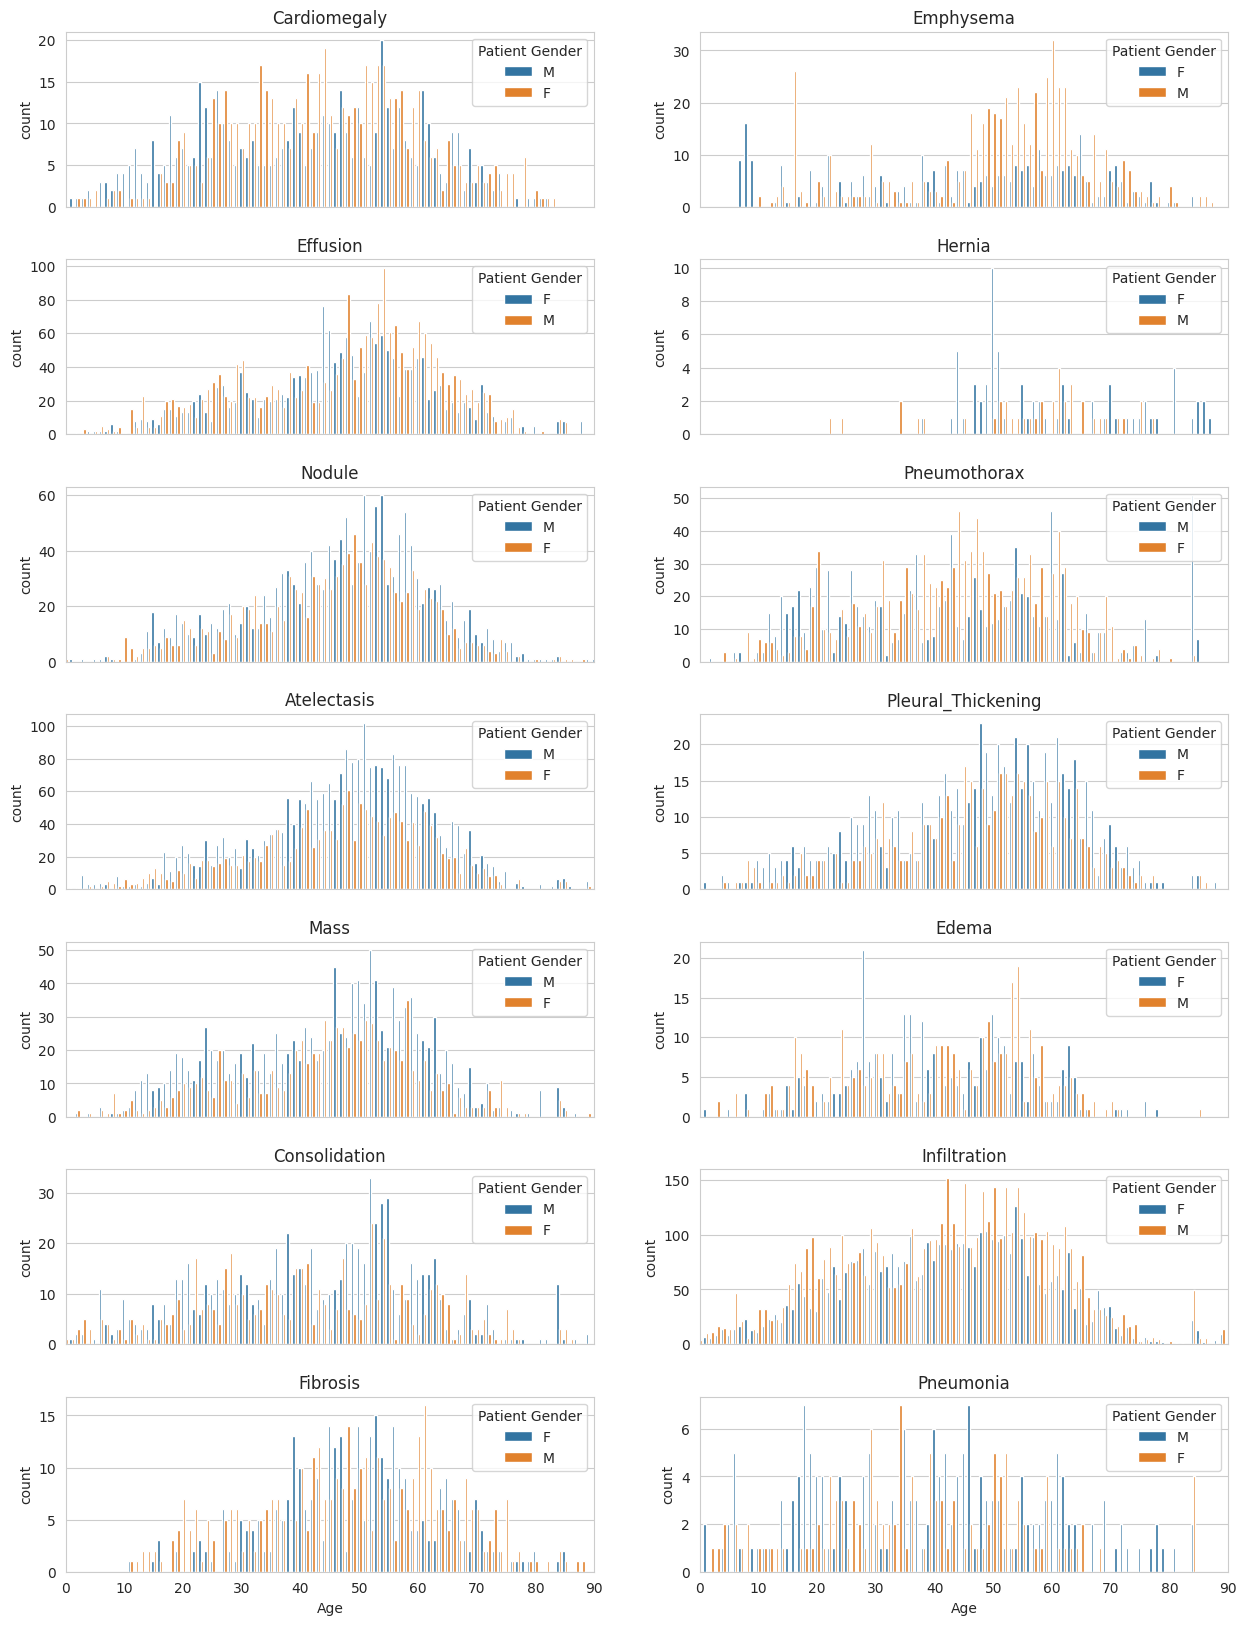

In [ ]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in diseases :
    g=sns.countplot(x='Age', hue="Patient Gender",data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)

### Pretrained Model Only

### Load data

In [ ]:
import pickle

train_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/test_data_sample_rgb.p"
(train_labels, train_data, train_tensors) = pickle.load(open(train_filename, mode='rb'))

valid_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/valid_data_sample_rgb.p"
(valid_labels, valid_data, valid_tensors) = pickle.load(open(valid_filename, mode='rb'))

test_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/test_data_sample_rgb.p"
(test_labels, test_data, test_tensors) = pickle.load(open(test_filename, mode='rb'))

### CNN model

In [ ]:
import time

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense
from keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers, applications, optimizers, initializers
from keras.preprocessing.image import ImageDataGenerator

# VGG19
# resnet50.ResNet50
# inception_v3.InceptionV3 299x299
# inception_resnet_v2.InceptionResNetV2 299x299

base_model = applications.VGG19(weights='imagenet',
                                include_top=False,
                                input_shape=train_tensors.shape[1:])
#for layer in base_model.layers[:-2]:
#    layer.trainable = False

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
# add_model.add(Conv2D(filters=512,
#                  kernel_size=4,
#                  strides=2,
# #                  kernel_regularizer=regularizers.l2(0.01),
# #                  activity_regularizer=regularizers.l1(0.01),
#                  kernel_initializer=initializers.random_normal(stddev=0.01),
#                  padding='same',
#                  activation='relu',
#                  input_shape=base_model.output_shape[1:]))
# # add_model.add(MaxPooling2D(pool_size=2))
# add_model.add(BatchNormalization())
# add_model.add(Flatten())
# add_model.add(Dropout(0.2))
# add_model.add(Dense(1024, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(50, activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(1, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

model.summary()
add_model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
from keras import backend as K
import tensorflow as tf
def binary_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))

def precision_threshold(y_true, y_pred):
#def precision(y_true, y_pred):
        threshold = 0.5
        threshold_value = threshold
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(y_pred)
        precision_ratio = true_positives / (predicted_positives + K.epsilon())
        return precision_ratio
#return precision

def recall_threshold(threshold = 0.5):
    def recall(y_true, y_pred):
        threshold_value = threshold
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.clip(y_true, 0, 1))
        recall_ratio = true_positives / (possible_positives + K.epsilon())
        return recall_ratio
    return recall

def fbeta_score_threshold(beta = 1, threshold = 0.5):
    def fbeta_score(y_true, y_pred):
        threshold_value = threshold
        beta_value = beta
        p = precision_threshold(threshold_value)(y_true, y_pred)
        r = recall_threshold(threshold_value)(y_true, y_pred)
        bb = beta_value ** 2
        fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
        return fbeta_score
    return fbeta_score

In [ ]:
import keras.backend as K
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1e-6,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[binary_accuracy,
                       tf.keras.metrics.Precision(thresholds = 0.4),
                       tf.keras.metrics.Recall(thresholds = 0.4)
                        ])
#add  to adjust
"""
#precision_threshold(threshold = 0.5),
#                       recall_threshold(threshold = 0.5),
#                       fbeta_score_threshold(beta=0.5, threshold = 0.5),
#                       precision_threshold(threshold = 0.6),
#                       recall_threshold(threshold = 0.6),
#                       fbeta_score_threshold(beta=0.5, threshold = 0.6)
"""

'\n#precision_threshold(threshold = 0.5),\n#                       recall_threshold(threshold = 0.5),\n#                       fbeta_score_threshold(beta=0.5, threshold = 0.5),\n#                       precision_threshold(threshold = 0.6),\n#                       recall_threshold(threshold = 0.6),\n#                       fbeta_score_threshold(beta=0.5, threshold = 0.6)\n'

In [ ]:
model.metrics_names


[]

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
import numpy as np

epochs = 20
batch_size = 32

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=1, mode='auto')
log = CSVLogger('/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/log_pretrained_CNN.csv')
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/pretrainedVGG.best.from_scratch.hdf5',
                               verbose=1, save_best_only=True)

start = time.time()
"""
model.fit(train_tensors, train_labels,
           validation_data=(valid_tensors, valid_labels),
           epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, log, earlystop], verbose=1)
"""
def train_generator(x, y, batch_size):
        train_datagen = ImageDataGenerator(
                        featurewise_center=False,  # set input mean to 0 over the dataset
                        samplewise_center=False,  # set each sample mean to 0
                        featurewise_std_normalization=False,  # divide inputs by std of the dataset
                        samplewise_std_normalization=False,  # divide each input by its std
                        zca_whitening=False,  # apply ZCA whitening
                        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                        horizontal_flip=True,  # randomly flip images
                        vertical_flip=False)  # randomly flip images
        generator = train_datagen.flow(x, y, batch_size=batch_size)
        while 1:
            x_batch, y_batch = generator.next()
            print(x_batch.shape)
            print(y_batch.shape)
            yield (x_batch, y_batch)

# Training with data augmentation. If shift_fraction=0., also no augmentation.
model.fit_generator(generator=train_generator(train_tensors, train_labels, batch_size),
                    steps_per_epoch=int(train_labels.shape[0] / batch_size),
                    validation_data=(valid_tensors, valid_labels),
                    epochs=epochs, callbacks=[checkpointer, log, earlystop], verbose=1)

# Show total training time
print("training time: %.2f minutes"%((time.time()-start)/60))


<ipython-input-39-6b63d7299153>:38: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator(train_tensors, train_labels, batch_size),


(32, 64, 64, 3)
(32, 1)
Epoch 1/20
(32, 64, 64, 3)
(32, 1)
(32, 64, 64, 3)
(32, 1)
 1/34 [..............................] - ETA: 10:14 - loss: 1.1136 - binary_accuracy: 0.4688 - precision_1: 1.0000 - recall_1: 0.1111(32, 64, 64, 3)
(32, 1)
 2/34 [>.............................] - ETA: 7:22 - loss: 0.9354 - binary_accuracy: 0.4688 - precision_1: 0.4118 - recall_1: 0.2258 (32, 64, 64, 3)
(32, 1)
 3/34 [=>............................] - ETA: 5:14 - loss: 0.8910 - binary_accuracy: 0.4583 - precision_1: 0.3514 - recall_1: 0.3023(32, 64, 64, 3)
(32, 1)
 4/34 [==>...........................] - ETA: 4:32 - loss: 0.8665 - binary_accuracy: 0.4453 - precision_1: 0.3333 - recall_1: 0.2982(32, 64, 64, 3)
(32, 1)
 5/34 [===>..........................] - ETA: 4:20 - loss: 0.8395 - binary_accuracy: 0.4563 - precision_1: 0.3433 - recall_1: 0.3333(32, 64, 64, 3)
(32, 1)
 6/34 [====>.........................] - ETA: 3:55 - loss: 0.8252 - binary_accuracy: 0.4635 - precision_1: 0.3537 - recall_1: 0.3494(32

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


34/34 [==============================] - 388s 11s/step - loss: 0.7654 - binary_accuracy: 0.5046 - precision_1: 0.4328 - recall_1: 0.4709 - val_loss: 0.6913 - val_binary_accuracy: 0.5542 - val_precision_1: 0.4726 - val_recall_1: 0.6283
Epoch 2/20
(32, 64, 64, 3)
(32, 1)
 1/34 [..............................] - ETA: 2:36 - loss: 0.8909 - binary_accuracy: 0.4706 - precision_1: 0.4000 - recall_1: 0.4444(32, 64, 64, 3)
(32, 1)
 2/34 [>.............................] - ETA: 4:48 - loss: 0.8361 - binary_accuracy: 0.4697 - precision_1: 0.3684 - recall_1: 0.2692(32, 64, 64, 3)
(32, 1)
 3/34 [=>............................] - ETA: 3:54 - loss: 0.8035 - binary_accuracy: 0.5006 - precision_1: 0.4118 - recall_1: 0.3333(32, 64, 64, 3)
(32, 1)
 4/34 [==>...........................] - ETA: 4:03 - loss: 0.7546 - binary_accuracy: 0.5473 - precision_1: 0.4151 - recall_1: 0.4151(32, 64, 64, 3)
(32, 1)
 5/34 [===>..........................] - ETA: 3:46 - loss: 0.7515 - binary_accuracy: 0.5441 - precision_1:

### Metric

In [ ]:
model.load_weights('/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/pretrainedVGG.best.from_scratch.hdf5')
prediction = model.predict(test_tensors)

35/35 [==============================] - 67s 2s/step


In [ ]:
import tensorflow.keras.backend as K

# Assuming you have imported fbeta_score_threshold from somewhere

threshold = 0.5
beta = 0.5

# Assuming 'prediction' and 'test_labels' are already defined

precision = tf.keras.metrics.Precision(thresholds=threshold)
precision.update_state(test_labels, prediction)
pre = K.eval(precision.result())

recall = tf.keras.metrics.Recall(thresholds=threshold)
recall.update_state(test_labels, prediction)
rec = K.eval(recall.result())


print("Precision: %f %%\nRecall: %f %%" % (pre, rec))


Precision: 0.529412 %
Recall: 0.017717 %


In [ ]:
K.eval(binary_accuracy(K.variable(value=test_labels),
                       K.variable(value=prediction)))

0.5411765

In [ ]:
prediction[:30]

array([[0.44274417],
       [0.40354705],
       [0.42935854],
       [0.3963659 ],
       [0.44220626],
       [0.43267176],
       [0.39136973],
       [0.38699502],
       [0.41994026],
       [0.3849034 ],
       [0.40350446],
       [0.38104203],
       [0.37560576],
       [0.4036371 ],
       [0.3948284 ],
       [0.43223995],
       [0.4225056 ],
       [0.39026996],
       [0.39585868],
       [0.37134323],
       [0.40352628],
       [0.42619464],
       [0.41352105],
       [0.39112052],
       [0.46140578],
       [0.43704814],
       [0.41620886],
       [0.44760758],
       [0.4131623 ],
       [0.3859031 ]], dtype=float32)

# Extra data

In [ ]:
import pickle

train_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/train_data_sample_rgb.p"
(train_labels, train_data, train_tensors) = pickle.load(open(train_filename, mode='rb'))

valid_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/valid_data_sample_rgb.p"
(valid_labels, valid_data, valid_tensors) = pickle.load(open(valid_filename, mode='rb'))

test_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/test_data_sample_rgb.p"
(test_labels, test_data, test_tensors) = pickle.load(open(test_filename, mode='rb'))

In [ ]:
import time
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Input, concatenate
from keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
from keras import applications
from keras import optimizers

base_model = applications.VGG19(weights='imagenet',
                                include_top=False,
                                input_shape=train_tensors.shape[1:])

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))

added_model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

inp = Input(batch_shape=(None, train_data.shape[1]))
extra_model = Model(inputs=inp, outputs=inp)

x = concatenate([added_model.output, extra_model.output])

x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[added_model.input, extra_model.input], outputs=x)

model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 64, 64, 64)           1792      ['input_2[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 64, 64, 64)           36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)           0         ['block1_conv2[0][0]']        
                                                                                            

In [ ]:
from keras import backend as K

def binary_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))

def precision_threshold(threshold = 0.5):
    def precision(y_true, y_pred):
        threshold_value = threshold
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(y_pred)
        precision_ratio = true_positives / (predicted_positives + K.epsilon())
        return precision_ratio
    return precision

def recall_threshold(threshold = 0.5):
    def recall(y_true, y_pred):
        threshold_value = threshold
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.clip(y_true, 0, 1))
        recall_ratio = true_positives / (possible_positives + K.epsilon())
        return recall_ratio
    return recall

def fbeta_score_threshold(beta = 1, threshold = 0.5):
    def fbeta_score(y_true, y_pred):
        threshold_value = threshold
        beta_value = beta
        p = precision_threshold(threshold_value)(y_true, y_pred)
        r = recall_threshold(threshold_value)(y_true, y_pred)
        bb = beta_value ** 2
        fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
        return fbeta_score
    return fbeta_score

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy',
              metrics=[binary_accuracy
                      ])

In [ ]:
train_tensors = train_tensors.astype('float32')
train_data = train_data.astype('float32')
train_labels = train_labels.astype('int32')  # Use int32 if your labels are categorical integers
valid_tensors = valid_tensors.astype('float32')
valid_data = valid_data.astype('float32')
valid_labels = valid_labels.astype('int32')  # Same here for validation labels

In [ ]:
train_tensors /= 255.0
valid_tensors /= 255.0

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
import numpy as np

epochs = 20
batch_size = 32

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
log = CSVLogger('/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/log_pretrained_extradata_CNN.csv')
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/pretrained_extradata_CNN.best.from_scratch.hdf5',
                               verbose=1, save_best_only=True)

start = time.time()
model.fit([train_tensors,  train_data], train_labels,
          validation_data=([valid_tensors, valid_data], valid_labels),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, log, earlystop], verbose=1)

# def train_generator(x1, x2, y, batch_size):
#         train_datagen = ImageDataGenerator(
#                         featurewise_center=False,  # set input mean to 0 over the dataset
#                         samplewise_center=False,  # set each sample mean to 0
#                         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#                         samplewise_std_normalization=False,  # divide each input by its std
#                         zca_whitening=False,  # apply ZCA whitening
#                         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#                         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#                         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#                         horizontal_flip=True,  # randomly flip images
#                         vertical_flip=False)  # randomly flip images
#         generator = train_datagen.flow((x1, x2), y, batch_size=batch_size)
#         while 1:
#             (x1_batch, x2_batch), y_batch = generator.next()
#             yield [[x1_batch, x2_batch], y_batch]

# # Training with data augmentation. If shift_fraction=0., also no augmentation.
# model.fit_generator(generator=train_generator(train_tensors, train_data, train_labels, batch_size),
#                     steps_per_epoch=int(train_labels.shape[0] / batch_size),
#                     validation_data=([valid_tensors, valid_data], valid_labels),
#                     epochs=epochs, callbacks=[checkpointer, log, earlystop], verbose=1)

# Show total training time
print("training time: %.2f minutes"%((time.time()-start)/60))

NameError: name 'time' is not defined

In [ ]:
test_tensors = test_tensors.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
model.load_weights('/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/pretrained_extradata_CNN.best.from_scratch.hdf5')
prediction = model.predict([test_tensors, test_data])

In [ ]:
threshold = 0.5
beta = 0.5

pre = K.eval(precision_threshold(threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))
rec = K.eval(recall_threshold(threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))
fsc = K.eval(fbeta_score_threshold(beta = beta, threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))

print ("Precision: %f %%\nRecall: %f %%\nFscore: %f %%"% (pre, rec, fsc))

Precision: 0.519231 %
Recall: 0.210938 %
Fscore: 0.401786 %


In [ ]:
K.eval(binary_accuracy(K.variable(value=test_labels),
                       K.variable(value=prediction)))

0.54389143

In [ ]:
prediction[:30]

array([[0.37429914],
       [0.3963557 ],
       [0.51241785],
       [0.40021414],
       [0.42272502],
       [0.50226086],
       [0.41685945],
       [0.4053318 ],
       [0.55822986],
       [0.37619165],
       [0.42632797],
       [0.52731633],
       [0.4241681 ],
       [0.50859874],
       [0.48237658],
       [0.4496713 ],
       [0.4068867 ],
       [0.5508483 ],
       [0.513692  ],
       [0.4002156 ],
       [0.40294126],
       [0.39611614],
       [0.4017102 ],
       [0.49951783],
       [0.4483986 ],
       [0.43662602],
       [0.3739619 ],
       [0.56120884],
       [0.3916606 ],
       [0.397538  ]], dtype=float32)

# Train with extra data and spatial transformer

In [ ]:
import pickle

train_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/train_data_sample_rgb.p"
(train_labels, train_data, train_tensors) = pickle.load(open(train_filename, mode='rb'))

valid_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/valid_data_sample_rgb.p"
(valid_labels, valid_data, valid_tensors) = pickle.load(open(valid_filename, mode='rb'))

test_filename = "/content/drive/MyDrive/Lung-Diseases-Classifier-master/data_preprocessed/test_data_sample_rgb.p"
(test_labels, test_data, test_tensors) = pickle.load(open(test_filename, mode='rb'))

In [ ]:
import time
import numpy as np

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Lambda
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
from keras import applications
from keras.models import Model
from keras import optimizers
from keras.layers import Input, concatenate
from spatial_transformer import SpatialTransformer

def locnet():
    b = np.zeros((2, 3), dtype='float32')
    b[0, 0] = 1
    b[1, 1] = 1
    W = np.zeros((64, 6), dtype='float32')
    weights = [W, b.flatten()]
    locnet = Sequential()

    locnet.add(Conv2D(16, (7, 7), padding='valid', input_shape=train_tensors.shape[1:]))
    locnet.add(MaxPooling2D(pool_size=(2, 2)))
    locnet.add(Conv2D(32, (5, 5), padding='valid'))
    locnet.add(MaxPooling2D(pool_size=(2, 2)))
    locnet.add(Conv2D(64, (3, 3), padding='valid'))
    locnet.add(MaxPooling2D(pool_size=(2, 2)))

    locnet.add(Flatten())
    locnet.add(Dense(128, activation='elu'))
    locnet.add(Dense(64, activation='elu'))
    locnet.add(Dense(6, weights=weights))

    return locnet

base_model = applications.VGG19(weights='imagenet',
                                include_top=False,
                                input_shape=train_tensors.shape[1:])

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))

added0_model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

stn_model = Sequential()
stn_model.add(Lambda(
    lambda x: 2*x - 1.,
    input_shape=train_tensors.shape[1:],
    output_shape=train_tensors.shape[1:]))
stn_model.add(BatchNormalization())
stn_model.add(SpatialTransformer(localization_net=locnet(),
                                 output_size=train_tensors.shape[1:3]))

added_model = Model(inputs=stn_model.input, outputs=added0_model(stn_model.output))

inp = Input(batch_shape=(None, train_data.shape[1]))
# out = Dense(8)(inp)
extra_model = Model(inputs=inp, outputs=inp)

x = concatenate([added_model.output,
           extra_model.output])

# x = Dropout(0.5)(x)
# x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model =  Model(inputs=[added_model.input,
                extra_model.input],
                outputs=x)

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 lambda_input (InputLayer)   [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 lambda (Lambda)             (None, 64, 64, 3)            0         ['lambda_input[0][0]']        
                                                                                                  
 batch_normalization (Batch  (None, 64, 64, 3)            12        ['lambda[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 spatial_transformer (Spati  (None, 64, 64, 3)            247270    ['batch_normalization[0]

In [ ]:
from keras import backend as K

def binary_accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.round(y_pred)))

def precision_threshold(threshold = 0.5):
    def precision(y_true, y_pred):
        threshold_value = threshold
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(y_pred)
        precision_ratio = true_positives / (predicted_positives + K.epsilon())
        return precision_ratio
    return precision

def recall_threshold(threshold = 0.5):
    def recall(y_true, y_pred):
        threshold_value = threshold
        y_pred = K.cast(K.greater(K.clip(y_pred, 0, 1), threshold_value), K.floatx())
        true_positives = K.round(K.sum(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.clip(y_true, 0, 1))
        recall_ratio = true_positives / (possible_positives + K.epsilon())
        return recall_ratio
    return recall

def fbeta_score_threshold(beta = 1, threshold = 0.5):
    def fbeta_score(y_true, y_pred):
        threshold_value = threshold
        beta_value = beta
        p = precision_threshold(threshold_value)(y_true, y_pred)
        r = recall_threshold(threshold_value)(y_true, y_pred)
        bb = beta_value ** 2
        fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
        return fbeta_score
    return fbeta_score

In [ ]:
import keras.backend as K
import tensorflow as tf
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=[binary_accuracy
                       ])

In [ ]:
train_tensors = train_tensors.astype('float32')
train_data = train_data.astype('float32')
train_labels = train_labels.astype('int32')  # Use int32 if your labels are categorical integers
valid_tensors = valid_tensors.astype('float32')
valid_data = valid_data.astype('float32')
valid_labels = valid_labels.astype('int32')  # Same here for validation labels

In [ ]:
train_tensors /= 255.0
valid_tensors /= 255.0

In [ ]:
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping

epochs = 20
batch_size = 32

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
log = CSVLogger('/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/log_pretrained_extradata_stn_CNN.best.from_scratch.hdf5')
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/pretrained_extradata_stn_CNN.best.from_scratch.hdf5',
                               verbose=1, save_best_only=True)

start = time.time()

model.fit([train_tensors, train_data], train_labels,
          validation_data=([valid_tensors, valid_data], valid_labels),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer, log, earlystop], verbose=1)

# def train_generator(x, y, batch_size):
#         train_datagen = ImageDataGenerator(
#                         featurewise_center=False,  # set input mean to 0 over the dataset
#                         samplewise_center=False,  # set each sample mean to 0
#                         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#                         samplewise_std_normalization=False,  # divide each input by its std
#                         zca_whitening=False,  # apply ZCA whitening
#                         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#                         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#                         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#                         horizontal_flip=True,  # randomly flip images
#                         vertical_flip=False)  # randomly flip images
#         generator = train_datagen.flow(x, y, batch_size=batch_size)
#         while 1:
#             x_batch, y_batch = generator.next()
#             yield [x_batch, y_batch]

# # Training with data augmentation. If shift_fraction=0., also no augmentation.
# model.fit_generator(generator=train_generator(train_tensors, train_labels, batch_size),
#                     steps_per_epoch=int(train_labels.shape[0] / batch_size),
#                     validation_data=(valid_tensors, valid_labels),
#                     epochs=epochs, callbacks=[checkpointer, log, earlystop], verbose=1)

# Show total training time
print("training time: %.2f minutes"%((time.time()-start)/60))

Epoch 1/20
107/107 [==============================] - ETA: 0s - loss: 26585231360.0000 - binary_accuracy: 0.5126
Epoch 1: val_loss improved from inf to 0.69143, saving model to /content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/pretrained_extradata_stn_CNN.best.from_scratch.hdf5
107/107 [==============================] - 981s 9s/step - loss: 26585231360.0000 - binary_accuracy: 0.5126 - val_loss: 0.6914 - val_binary_accuracy: 0.5235
Epoch 2/20
107/107 [==============================] - ETA: 0s - loss: 35.0467 - binary_accuracy: 0.5508
Epoch 2: val_loss did not improve from 0.69143
107/107 [==============================] - 943s 9s/step - loss: 35.0467 - binary_accuracy: 0.5508 - val_loss: 0.6918 - val_binary_accuracy: 0.5235
Epoch 3/20
107/107 [==============================] - ETA: 0s - loss: 20.8286 - binary_accuracy: 0.5496
Epoch 3: val_loss did not improve from 0.69143
107/107 [==============================] - 937s 9s/step - loss: 20.8286 - binary_accuracy: 0.5496 

In [ ]:
test_tensors = test_tensors.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
model.load_weights('/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/pretrained_extradata_stn_CNN.best.from_scratch.hdf5')
prediction = model.predict([test_tensors, test_data])

35/35 [==============================] - 69s 2s/step


In [ ]:
threshold = 0.5
beta = 0.5

pre = K.eval(precision_threshold(threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))
rec = K.eval(recall_threshold(threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))
fsc = K.eval(fbeta_score_threshold(beta = beta, threshold = threshold)(K.variable(value=test_labels),
                                   K.variable(value=prediction)))

print ("Precision: %f %%\nRecall: %f %%\nFscore: %f %%"% (pre, rec, fsc))

In [ ]:
K.eval(binary_accuracy(K.variable(value=test_labels),
                       K.variable(value=prediction)))

0.5366516

# Model Architecture

In this notebook, i choice best model is optimized CNN with pretrained model and Spatial Transformer layer

Load model saved

In [ ]:
import time
import numpy as np
import pandas as pd
from glob import glob

from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Lambda
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
from keras import applications
from keras.models import Model
from keras import optimizers
from keras.layers import Input, concatenate
from spatial_transformer import SpatialTransformer

def locnet():
    b = np.zeros((2, 3), dtype='float32')
    b[0, 0] = 1
    b[1, 1] = 1
    W = np.zeros((64, 6), dtype='float32')
    weights = [W, b.flatten()]
    locnet = Sequential()

    locnet.add(Conv2D(16, (7, 7), padding='valid', input_shape=(64, 64, 3)))
    locnet.add(MaxPooling2D(pool_size=(2, 2)))
    locnet.add(Conv2D(32, (5, 5), padding='valid'))
    locnet.add(MaxPooling2D(pool_size=(2, 2)))
    locnet.add(Conv2D(64, (3, 3), padding='valid'))
    locnet.add(MaxPooling2D(pool_size=(2, 2)))

    locnet.add(Flatten())
    locnet.add(Dense(128, activation='elu'))
    locnet.add(Dense(64, activation='elu'))
    locnet.add(Dense(6, weights=weights))

    return locnet

base_model = applications.VGG19(weights='imagenet',
                                include_top=False,
                                input_shape=(64, 64, 3))

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))

added0_model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

stn_model = Sequential()
stn_model.add(Lambda(
    lambda x: 2*x - 1.,
    input_shape=(64, 64, 3),
    output_shape=(64, 64, 3)))
stn_model.add(BatchNormalization())
stn_model.add(SpatialTransformer(localization_net=locnet(),
                                 output_size=(64, 64)))

added_model = Model(inputs=stn_model.input, outputs=added0_model(stn_model.output))

inp = Input(batch_shape=(None, 5))
# out = Dense(8)(inp)
extra_model = Model(inputs=inp, outputs=inp)

x = concatenate([added_model.output,
           extra_model.output])

# x = Dropout(0.5)(x)
# x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model =  Model(inputs=[added_model.input,
                extra_model.input],
                outputs=x)

model.load_weights('/content/drive/MyDrive/Lung-Diseases-Classifier-master/saved_models/pretrained_extradata_stn_CNN.best.from_scratch.hdf5')

This fuction below resize and convert images to numpy array

In [ ]:
from keras.preprocessing import image

def path_to_tensor(img_path, shape=(64, 64)):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=shape)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)/255
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.vstack([np.expand_dims(x, axis=0)])

And function to preprocessing extra data

In [ ]:
def features_preprocessing(age, gender, view):
    agetype = age[-1]
    age = int(age[:-1])
    age = {
              'Y': lambda x: x,
              'M': lambda x: x / 12.,
              'D': lambda x: x / 365.
            }[agetype](age)
    if (gender == 'M'):
        m = 1
        f = 0
    else:
        m = 0
        f = 1

    if (view == 'AP'):
        ap = 1
        pa = 0
    else:
        ap = 0
        pa = 1
    return np.array([[age, f, m, ap, pa]])

In [ ]:
def predict(img, age, gender, view):
    return model.predict([path_to_tensor(img), features_preprocessing(age, gender, view)])

In [ ]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

def show_image(img_path):
    image = cv2.imread(img_path)
    plt.imshow(image)
    plt.show()

I will test with 20 random samples

1/1 [==============================] - 2s 2s/step


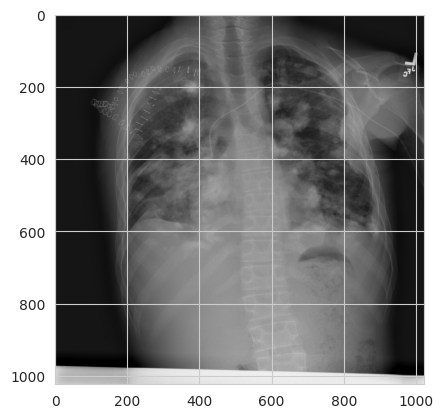

True: Effusion|Nodule, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 303ms/step


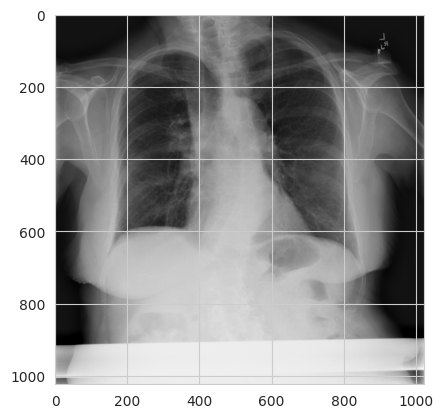

True: Consolidation, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 148ms/step


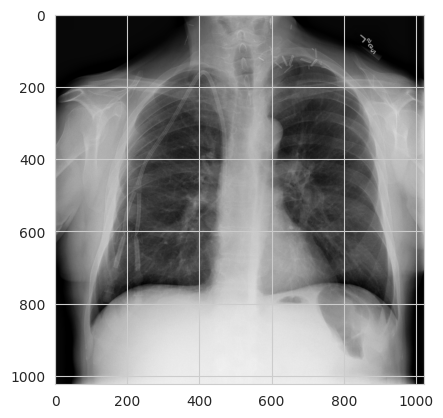

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 258ms/step


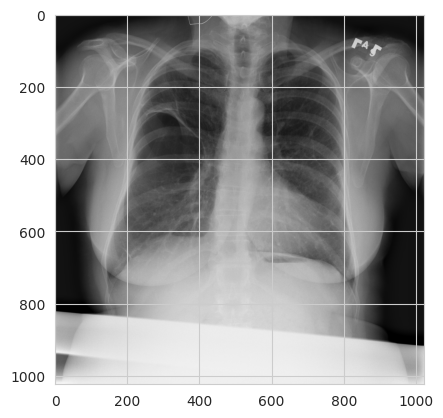

True: Pneumothorax, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 363ms/step


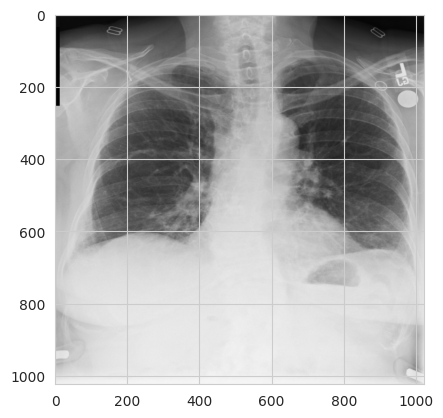

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 147ms/step


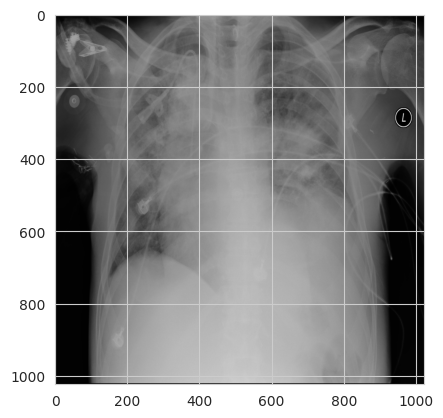

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 141ms/step


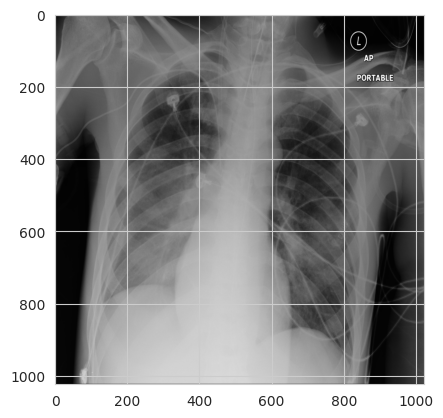

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 193ms/step


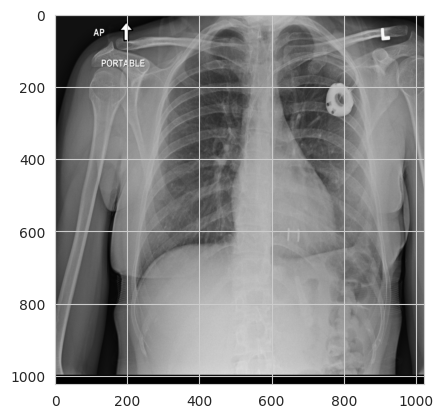

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 204ms/step


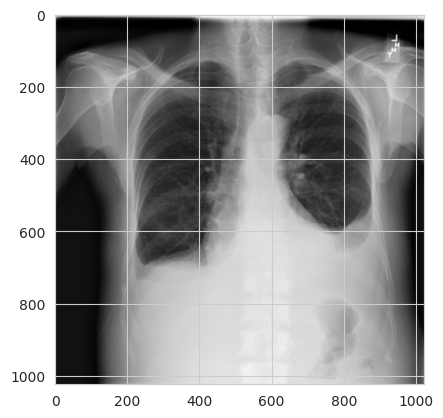

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 145ms/step


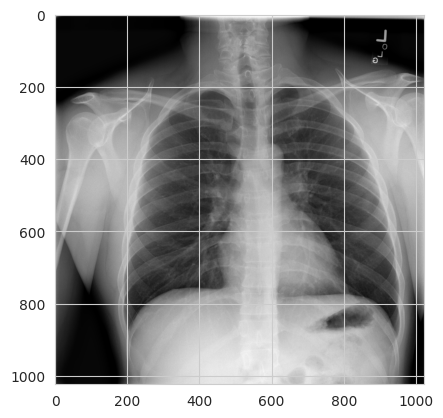

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 84ms/step


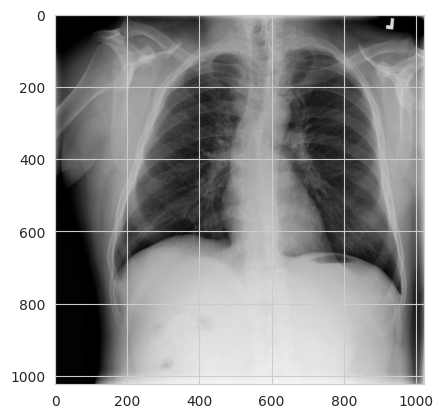

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 83ms/step


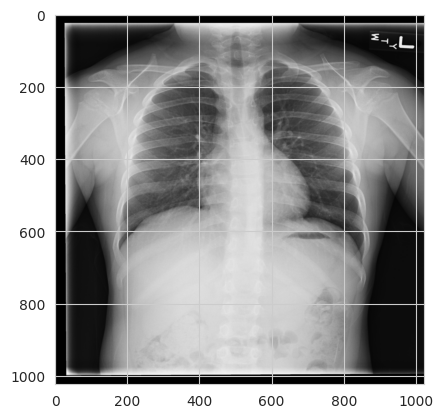

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 95ms/step


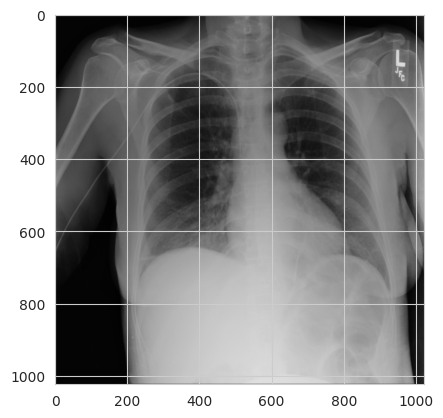

True: Atelectasis, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 84ms/step


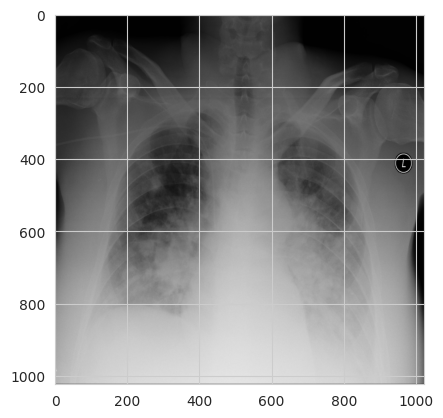

True: Infiltration|Mass, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 105ms/step


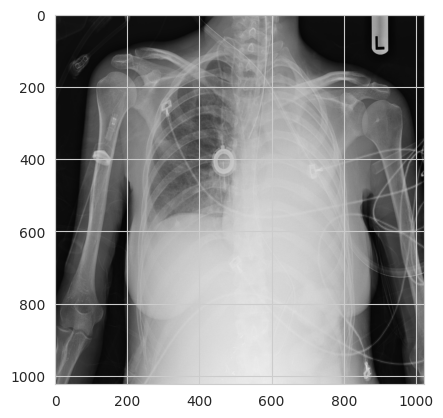

True: No Finding, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 92ms/step


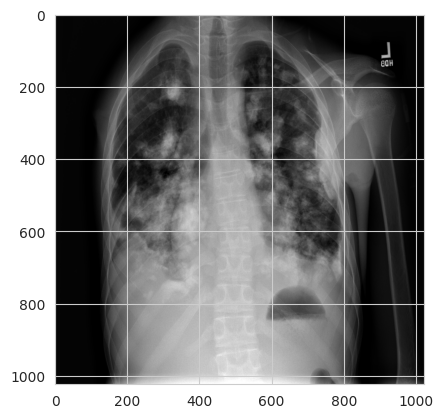

True: Effusion, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 92ms/step


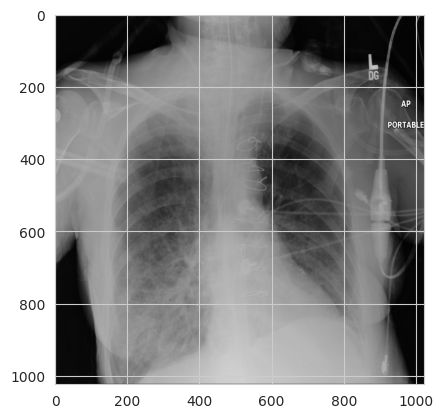

True: Infiltration, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 111ms/step


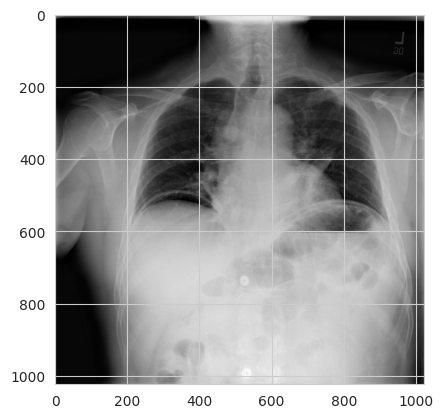

True: Atelectasis, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 94ms/step


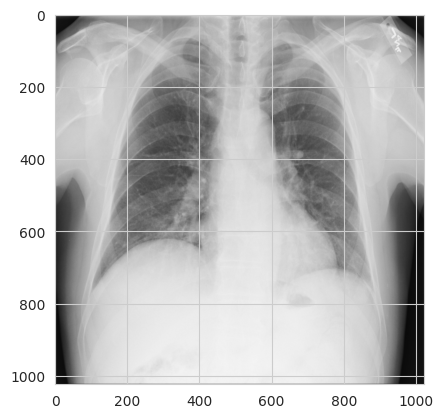

True: Effusion, Predict: No Finding, confident: 0.46355128
1/1 [==============================] - 0s 98ms/step


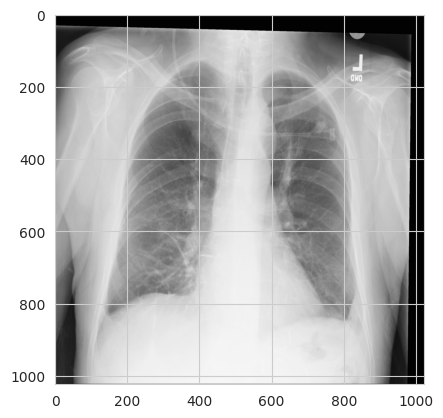

True: Atelectasis|Effusion|Infiltration, Predict: No Finding, confident: 0.46355128


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Lung-Diseases-Classifier-master/data sample/sample_labels.csv').sample(20)

for i in range(len(df)):
    img, age, gender, view = '/content/images/' + df.iloc[i]['Image Index'], df.iloc[i]['Patient Age'], df.iloc[i]['Patient Gender'], df.iloc[i]['View Position']
    pre = predict(img, age, gender, view)[0][0]
    show_image(img)
    y_true = df.iloc[i]['Finding Labels']
    y_predict = "Finding" if (pre >= 0.5) else "No Finding"
    print ("True: %s, Predict: %s, confident: %s" % (y_true, y_predict, pre))